In [1]:
from test import Test
from load_data import load_data
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
T = 100
N_ITERATIONS = 100.
DATA_SET = ['Bar Exam', 'Default on Credit'][0] # = 'Bar Exam'
bandits = load_data(DATA_SET)
e1 = [0.000001, 2., 10000.]
e2 = [0.000001, 2., 10000.]
delta = [0.000001, 0.5, 1.]
lam = [1]

In [3]:
TEST_THOMPSON = 1
TEST_SD_TS = 1
TEST_FAIR_SD_TS = 1

METHODS = TEST_THOMPSON*['Thompson Sampling'] + TEST_SD_TS*['Stochastic Dominance Thompson Sampling'] + \
          TEST_FAIR_SD_TS*['Fair Stochastic Dominance Thompson Sampling']
test_bounds = Test(bandits, METHODS, N_ITERATIONS, T, e1, e2, delta, lam)

test_bounds.add_test_case(bandits,'Stochastic Dominance Thompson Sampling', 2, 0, 0)


In [4]:
test_bounds.print_result()


####################
Thompson Sampling
####################

Iterations:	100.0
T:		10
e1:		1e-06
e2:		1e-06
delta:	1e-06
Lambda: 0
Smooth Fair:	0.0
Not Smooth Fair:	100.0
=> Smooth Fair with Prob:	0.0
Needed Probability: 1-delta	= 0.999999
Cumulative Fairness Regret	7.97798058801
Regret	0.709139859035

####################
Stochastic Dominance Thompson Sampling
####################

Iterations:	100.0
T:		10
e1:		1e-06
e2:		1e-06
delta:	1e-06
Lambda: 1
Smooth Fair:	0.01
Not Smooth Fair:	99.99
=> Smooth Fair with Prob:	0.0001
Needed Probability: 1-delta	= 0.999999
Cumulative Fairness Regret	2.30200392587
Regret	0.733156776165

####################
Stochastic Dominance Thompson Sampling
####################

Iterations:	100.0
T:		10
e1:		1e-06
e2:		1e-06
delta:	0.5
Lambda: 1
Smooth Fair:	0.0
Not Smooth Fair:	100.0
=> Smooth Fair with Prob:	0.0
Needed Probability: 1-delta	= 0.5
Cumulative Fairness Regret	2.31596936045
Regret	0.81129871507

####################
Stochastic Dominance Thompso

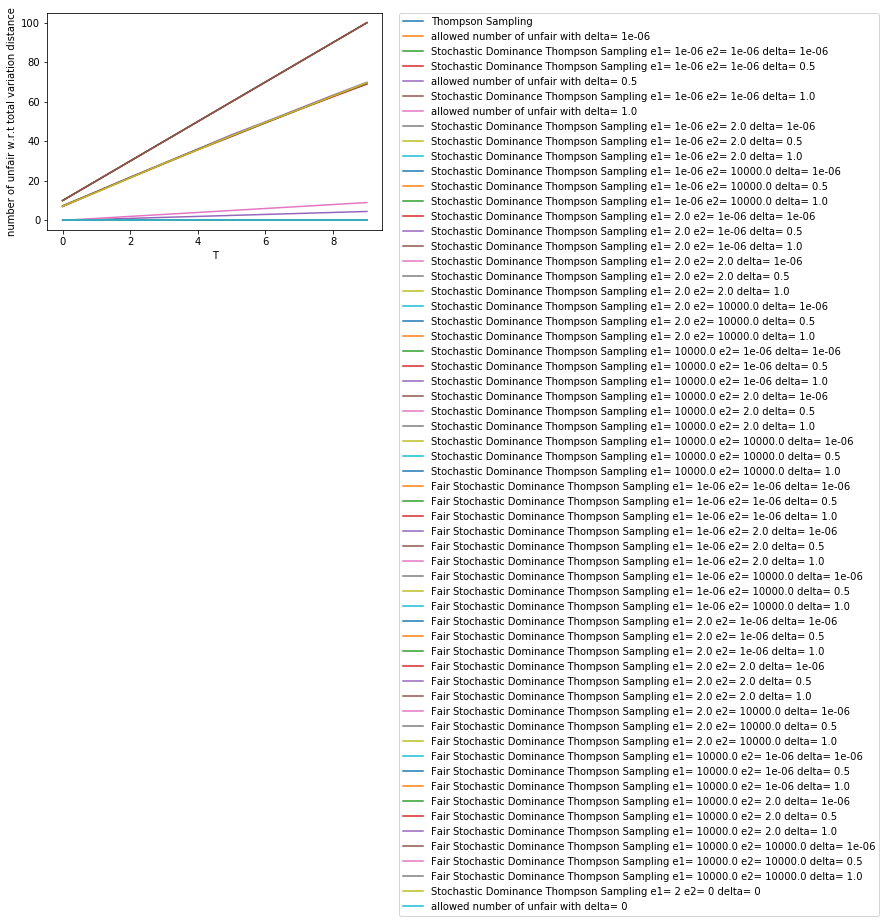

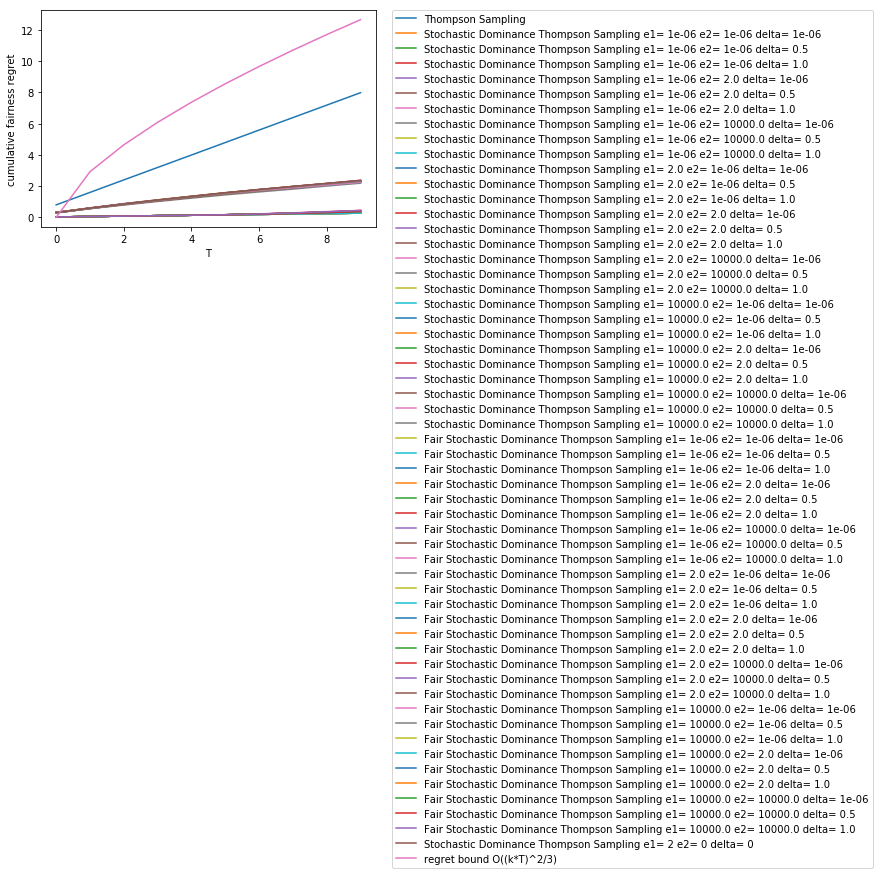

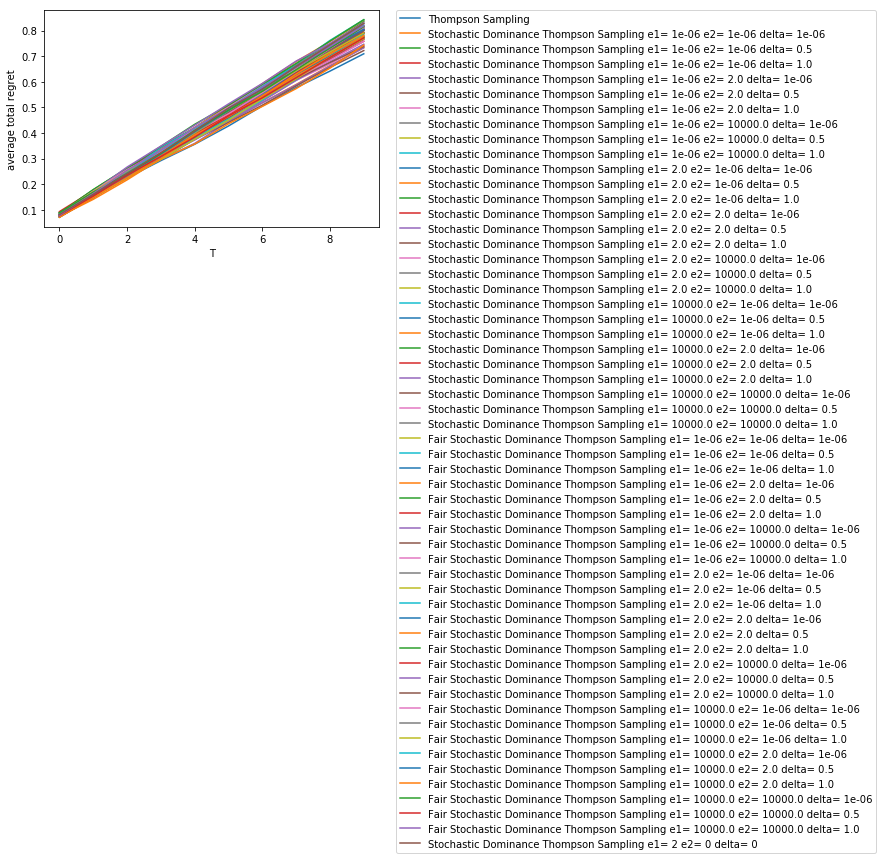

In [5]:
test_bounds.plot_smooth_fairness()
test_bounds.plot_fairness_regret()
test_bounds.plot_average_total_regret()

In [10]:
TEST_THOMPSON = 0
TEST_SD_TS = 0
TEST_FAIR_SD_TS = 1


METHODS = TEST_THOMPSON*['Thompson Sampling'] + TEST_SD_TS*['Stochastic Dominance Thompson Sampling'] + \
          TEST_FAIR_SD_TS*['Fair Stochastic Dominance Thompson Sampling']

n_lam = 10
e1 = [2]
e2 = [0.001]
delta = [1.0]
lam = np.linspace(0,1,n_lam)
regret_tradeoff = Test(bandits, METHODS, N_ITERATIONS, T, e1, e2, delta, lam)





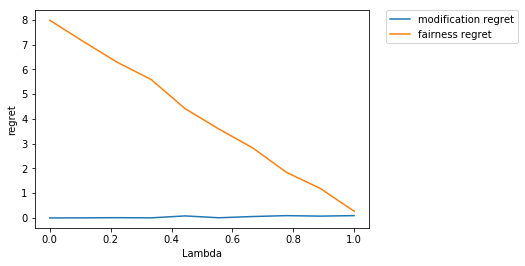

In [9]:
modification_regret = np.zeros(n_lam)
fairness_regret = np.zeros(n_lam)
for i in range(n_lam):
    modification_regret[i] = abs(regret_tradeoff.test_cases[i].regret[-1]-regret_tradeoff.test_cases[0].regret[-1])
    fairness_regret[i] = (regret_tradeoff.test_cases[i].average_fairness_regret[-1])

plt.plot(lam, modification_regret, label='modification regret')
plt.plot(lam, fairness_regret, label='fairness regret')
plt.xlabel('Lambda')
plt.ylabel('regret')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
